<a href="https://colab.research.google.com/github/TymYama/CS4650/blob/main/HW5_CS_4650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Setup
!pip install newsapi-python
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 MB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [75]:
#Imports
import spacy
from newsapi import NewsApiClient
from collections import Counter
import pickle
import pandas as pd
import string
import nltk
from nltk import pos_tag
from nltk import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nlp_eng = spacy.load('en_core_web_lg')

newsapi = NewsApiClient (api_key='737ebdeea99e483aa492394c52bb1a4c')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
#Get Data
temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-03-01', to='2022-03-27', sort_by='relevancy',  page_size = 100)
dados = []
articles = temp['articles']
results = []

filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/content/drive/MyDrive/Articles/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

for i, article in enumerate(articles):
        title = article['title']
        description = article['description']
        content = article['content']
        dados.append({'title':title[0], 'desc':description[0], 'content':content})
        
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

def get_keywords_eng(m):
  result = []
  tokens = word_tokenize(m)
  token = pos_tag(tokens)
  allowedTypes = ['VB', 'NNP', 'NN', 'NNS', 'NNPS', 'VBG', 'VBD', 'VBN', 'VBP', 'VBZ']
  #x[0] is the word(tree) and x[1] is the type(NN for singular noun)
  for x in token:
    if (x[0] in nlp_eng.Defaults.stop_words or x[0] in string.punctuation):
      continue
    if (x[1] in allowedTypes):
      result.append(x[0])
  return result

for content in df.content.values:
    results.append([(x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])

df['keywords'] = results
df.to_excel('/content/drive/MyDrive/Articles/output.xlsx', sheet_name = 'DataFrame')

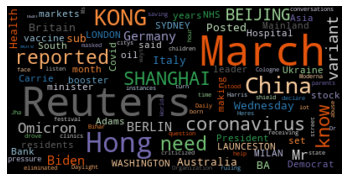

In [77]:
#Word cloud
text = ''
for x in results:
  for y in x:
   text += " " + y
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black", colormap ='tab20c', collocations=False).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()